<a href="https://colab.research.google.com/github/germanmesa1/German-Mesa/blob/main/Copia_de_Final_proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 1


In [ ]:
from google.colab import drive, files
import pandas as pd
import io

In [ ]:
# Subir archivo desde el dispositivo
uploaded = files.upload()

# Cargar el primer archivo subido en un DataFrame de pandas
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(io.BytesIO(uploaded[fn]))

df.head()

Saving Student_performance_data .csv to Student_performance_data .csv
User uploaded file "Student_performance_data .csv" with length 166901 bytes


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
# Variable objetivo
Y = "GradeClass"
df[Y].value_counts()

,count
GradeClass,
4.0,1211
3.0,414
2.0,391
1.0,269
0.0,107


In [ ]:
# Tabla de variables
variables_info = {
    "Variable": [
        "StudentID","Age","Gender","Ethnicity","ParentalEducation",
        "StudyTimeWeekly","Absences","Tutoring","ParentalSupport",
        "Extracurricular","Sports","Music","Volunteering","GPA","GradeClass"
    ],
    "Tipo": [
        "Cuantitativa","Cuantitativa","Cualitativa","Cualitativa","Cualitativa",
        "Cuantitativa","Cuantitativa","Cualitativa","Cualitativa",
        "Cualitativa","Cualitativa","Cualitativa","Cualitativa","Cuantitativa","Cualitativa"
    ],
    "Dato": [
        "Discreta","Discreta","Categórica","Categórica","Ordinal",
        "Continua","Discreta","Categórica","Ordinal",
        "Categórica","Categórica","Categórica","Categórica","Continua","Categórica"
    ],
    "Unidad": [
        "-", "Años", "-", "-", "-",
        "Horas", "Días", "-", "-",
        "-", "-", "-", "-", "-", "-"
    ]
}

pd.DataFrame(variables_info)


,Variable,Tipo,Dato,Unidad
0,StudentID,Cuantitativa,Discreta,-
1,Age,Cuantitativa,Discreta,Años
2,Gender,Cualitativa,Categórica,-
3,Ethnicity,Cualitativa,Categórica,-
4,ParentalEducation,Cualitativa,Ordinal,-
5,StudyTimeWeekly,Cuantitativa,Continua,Horas
6,Absences,Cuantitativa,Discreta,Días
7,Tutoring,Cualitativa,Categórica,-
8,ParentalSupport,Cualitativa,Ordinal,-
9,Extracurricular,Cualitativa,Categórica,-


# Punto 2

# Punto 3


3.1 Estadísticos descriptivos (cuantitativas)

In [ ]:
# Variables cuantitativas
quant_vars = ["Age","StudyTimeWeekly","Absences","GPA"]

# Estadísticos
df[quant_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
GPA,2392.0,1.906186,0.915156,0.000000,1.174803,1.893393,2.622216,4.000000


In [ ]:
# Asimetría y curtosis
df[quant_vars].agg(["skew","kurtosis"]).T


,skew,kurtosis
Age,0.035793,-1.372099
StudyTimeWeekly,0.050068,-1.135682
Absences,-0.026017,-1.176225
GPA,0.014526,-0.863277


3.2 Histogramas, boxplots y densidades por clase Y

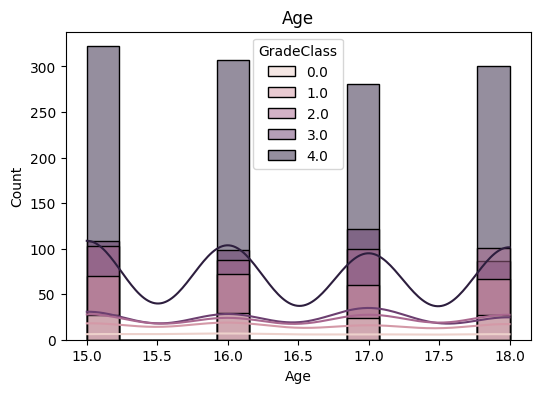

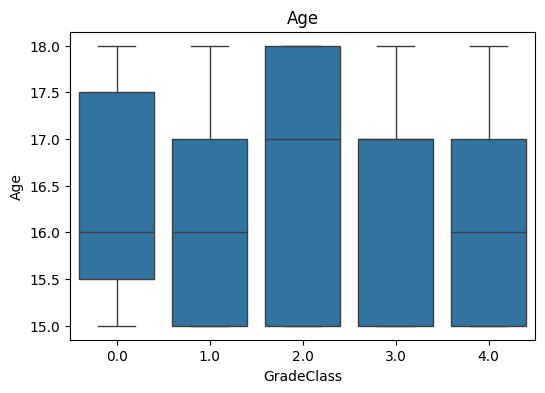

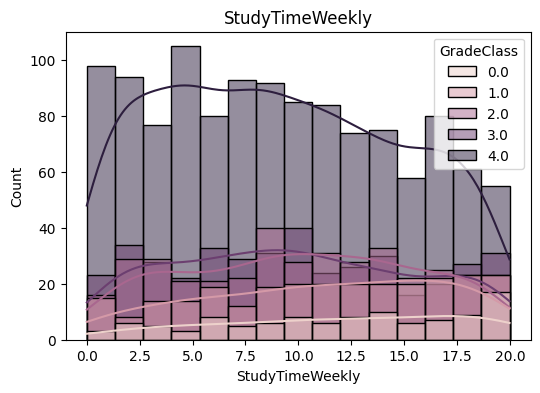

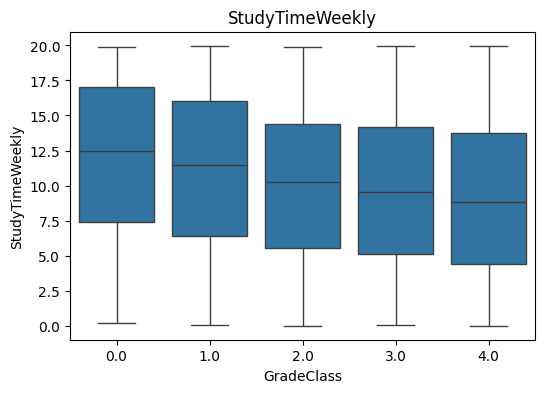

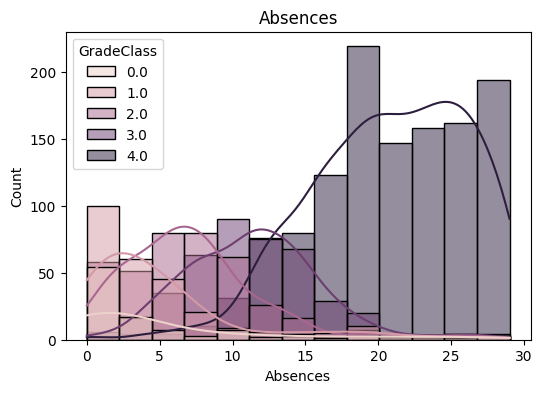

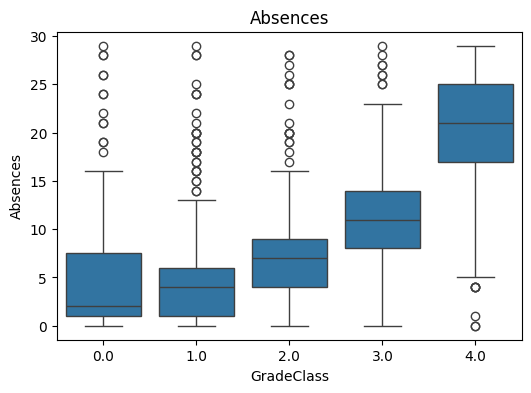

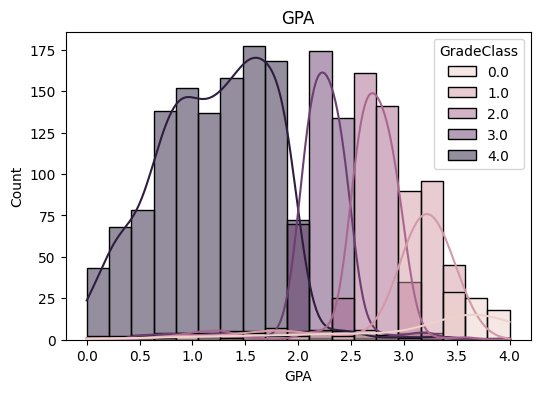

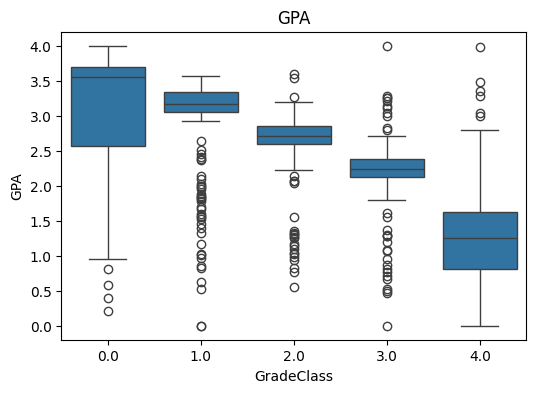

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for v in quant_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=v, hue="GradeClass", kde=True)
    plt.title(v)
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="GradeClass", y=v)
    plt.title(v)
    plt.show()

3.3 Detección de outliers

IQR, Z-score y DBSCAN.

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.stats import zscore

outliers = {}

for v in quant_vars:

    # IQR
    Q1 = df[v].quantile(0.25)
    Q3 = df[v].quantile(0.75)
    IQR = Q3 - Q1
    iqr_mask = (df[v] < Q1 - 1.5*IQR) | (df[v] > Q3 + 1.5*IQR)

    # Z-score
    z = np.abs(zscore(df[v]))
    z_mask = z > 3

    # DBSCAN
    db = DBSCAN(eps=0.5, min_samples=5).fit(df[[v]])
    db_mask = db.labels_ == -1

    outliers[v] = {
        "IQR": iqr_mask.sum(),
        "Zscore": z_mask.sum(),
        "DBSCAN": db_mask.sum()
    }

pd.DataFrame(outliers).T


,IQR,Zscore,DBSCAN
Age,0,0,0
StudyTimeWeekly,0,0,0
Absences,0,0,0
GPA,0,0,0


3.4 Transformaciones (Box-Cox y log)

In [ ]:
from scipy.stats import boxcox

df_trans = df.copy()

for v in quant_vars:
    # Box-Cox (requiere valores positivos)
    if (df[v] > 0).all():
        df_trans[v+"_bc"], _ = boxcox(df[v])
    # Log
    df_trans[v+"_log"] = np.log1p(df[v])


In [ ]:
# Skew antes-después
skew_compare = pd.DataFrame({
    "Original": df[quant_vars].skew(),
    "BoxCox": df_trans[[v+"_bc" for v in quant_vars if (df[v] > 0).all()]].skew(),
    "Log": df_trans[[v+"_log" for v in quant_vars]].skew()
})
skew_compare


,Original,BoxCox,Log
Absences,-0.026017,NaN,NaN
Absences_log,NaN,NaN,-1.269621
Age,0.035793,NaN,NaN
Age_bc,NaN,-0.009312,NaN
Age_log,NaN,NaN,-0.024673
GPA,0.014526,NaN,NaN
GPA_log,NaN,NaN,-0.624052
StudyTimeWeekly,0.050068,NaN,NaN
StudyTimeWeekly_bc,NaN,-0.277397,NaN
StudyTimeWeekly_log,NaN,NaN,-1.006086


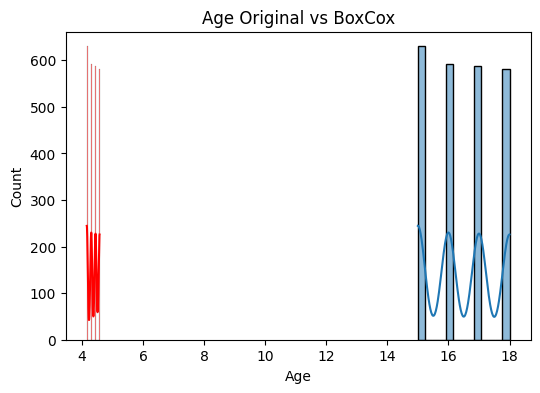

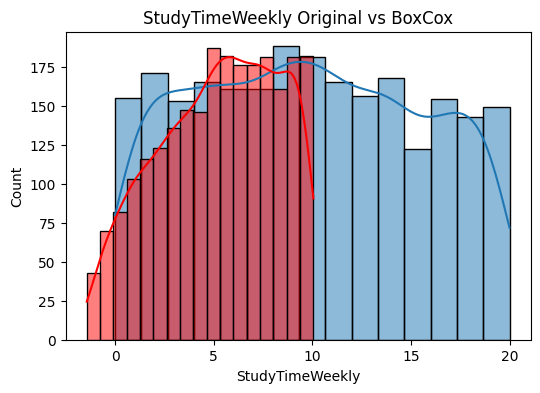

In [ ]:
# Gráficos antes/después (ejemplo)
for v in quant_vars:
    if (df[v] > 0).all():
        plt.figure(figsize=(6,4))
        sns.histplot(df[v], kde=True)
        sns.histplot(df_trans[v+"_bc"], color="red", kde=True)
        plt.title(v + " Original vs BoxCox")
        plt.show()


3.5 Variable cualitativa (barras + contingencia)

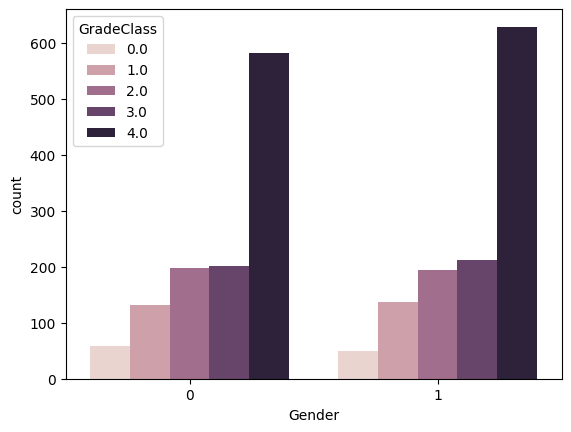

GradeClass,0.0,1.0,2.0,3.0,4.0
Gender,,,,,
0,58,132,197,201,582
1,49,137,194,213,629


In [ ]:
# Seleccionamos una cualitativa representativa
qual_var = "Gender"

sns.countplot(data=df, x=qual_var, hue="GradeClass")
plt.show()

pd.crosstab(df[qual_var], df["GradeClass"])


3.6 Balance de clases (Y)

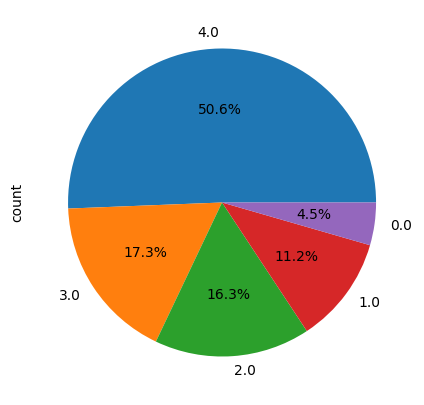

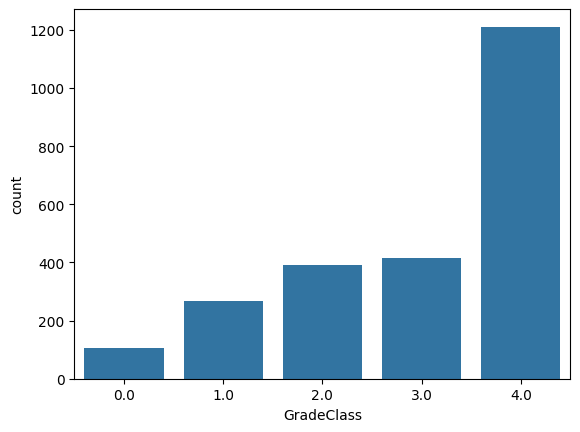

In [ ]:
df["GradeClass"].value_counts(normalize=True)*100

plt.figure(figsize=(5,5))
df["GradeClass"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

sns.countplot(x=df["GradeClass"])
plt.show()


# Punto 4

4.1 Normalidad por grupo

(Aquí evaluamos si cada variable cuantitativa es normal dentro de cada clase de Y.)

In [ ]:
from scipy.stats import shapiro

quant_vars = ["Age","StudyTimeWeekly","Absences","GPA"]
normality_results = {}

for v in quant_vars:
    normality_results[v] = {}                           # almacenar p-valores
    for g in df["GradeClass"].unique():
        data_group = df[df["GradeClass"] == g][v]       # datos del grupo
        stat, p = shapiro(data_group)                   # prueba de normalidad
        normality_results[v][f"Clase_{g}"] = p          # guardar p-valor

pd.DataFrame(normality_results)                         # tabla final


,Age,StudyTimeWeekly,Absences,GPA
Clase_2.0,6.917435e-19,3.123477e-08,1.930677e-15,1.335633e-27
Clase_1.0,2.616885e-15,4.404954e-07,3.136408e-19,9.538199e-24
Clase_4.0,3.327488e-32,3.969361e-18,3.035193e-16,3.141585e-13
Clase_3.0,1.023691e-18,1.940031e-09,3.972901e-07,1.268661e-25
Clase_0.0,7.075690e-09,9.873189e-05,1.662922e-12,3.507069e-11


4.2 ANOVA o Kruskal-Wallis

(Elegimos la prueba según normalidad: si todos los grupos son normales → ANOVA; si no → Kruskal.)

In [ ]:
from scipy.stats import f_oneway, kruskal

comparisons = {}

for v in quant_vars:
    groups = [df[df["GradeClass"] == g][v] for g in df["GradeClass"].unique()]  # dividir datos por clase
    pvals_norm = [shapiro(g)[1] for g in groups]                                # p-valores normalidad
    all_normal = all(p > 0.05 for p in pvals_norm)                              # verificar normalidad total

    if all_normal:
        stat, p = f_oneway(*groups)         # ANOVA
        comparisons[v] = {"Prueba":"ANOVA", "p":p}
    else:
        stat, p = kruskal(*groups)          # Kruskal-Wallis
        comparisons[v] = {"Prueba":"Kruskal", "p":p}

pd.DataFrame(comparisons).T                 # tabla final de pruebas


,Prueba,p
Age,Kruskal,0.95693
StudyTimeWeekly,Kruskal,0.0
Absences,Kruskal,0.0
GPA,Kruskal,0.0


4.3 Chi-cuadrado para variable cualitativa

(Evaluamos independencia entre una variable cualitativa y la clase Y.)

In [ ]:
import scipy.stats as stats

tabla = pd.crosstab(df["Gender"], df["GradeClass"])         # tabla de contingencia
chi2, p, dof, expected = stats.chi2_contingency(tabla)      # chi-cuadrado

{"chi2": chi2, "p": p}                                       # resultado


{'chi2': np.float64(1.9153728454653411), 'p': np.float64(0.7513204328843887)}

4.4 Identificar variables significativas

(Filtramos solo variables con p < 0.05.)

In [ ]:
signif = {v: comparisons[v] for v in comparisons if comparisons[v]["p"] < 0.05}  # significativas
signif


{'StudyTimeWeekly': {'Prueba': 'Kruskal',
  'p': np.float64(5.675505709111449e-09)},
 'Absences': {'Prueba': 'Kruskal', 'p': np.float64(9.1888335417128e-310)},
 'GPA': {'Prueba': 'Kruskal', 'p': np.float64(0.0)}}

# Punto 5

In [ ]:
signif_quant = [v for v in quant_vars if v in signif]   # variables cuantitativas significativas
signif_quant


['StudyTimeWeekly', 'Absences', 'GPA']

5.1 Matriz de correlación

(Calculamos correlaciones entre las variables cuantitativas significativas.)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[signif_quant].corr()              # matriz de correlación
corr


,StudyTimeWeekly,Absences,GPA
StudyTimeWeekly,1.000000,0.009326,0.179275
Absences,0.009326,1.000000,-0.919314
GPA,0.179275,-0.919314,1.000000


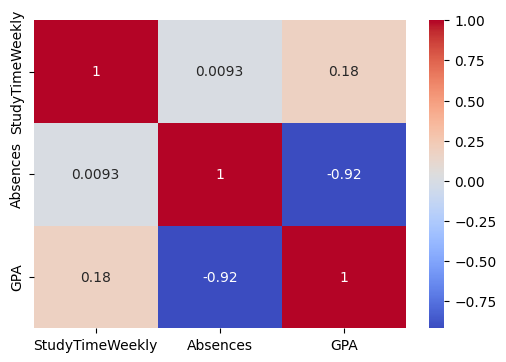

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")  # mapa de calor
plt.show()


5.2 Eliminar variables con correlación > 0.8

(Umbral obligatorio para evitar multicolinealidad.)

In [ ]:
to_drop = []                                            # lista de variables a eliminar

for v in corr.columns:
    for u in corr.columns:
        if v != u and abs(corr.loc[v,u]) > 0.8:         # condición de correlación alta
            to_drop.append(u)                           # marcamos variable

set(to_drop)                                             # variables eliminables


{'Absences', 'GPA'}

In [ ]:
# Variables significativas cuantitativas disponibles:
print(f"Variables significativas disponibles: {signif_quant}")

# Modifica esta lista para incluir las variables que deseas eliminar
# Por ejemplo, si quieres eliminar 'GPA', la lista sería: ['GPA']
to_drop = ['GPA'] # Por defecto, mantenemos solo 'GPA' para eliminar como se especificó anteriormente

print(f"Variables seleccionadas para eliminar: {to_drop}")

# Recalcular final_vars con la lista `to_drop` actualizada
final_vars = [v for v in signif_quant if v not in to_drop]
print(f"Las variables finales después de la selección son: {final_vars}")

Variables significativas disponibles: ['StudyTimeWeekly', 'Absences', 'GPA']
Variables seleccionadas para eliminar: ['GPA']
Las variables finales después de la selección son: ['StudyTimeWeekly', 'Absences']


5.3 Conjunto final de variables explicativas

(Quitamos las variables altamente correlacionadas.)

Dado que Absences y GPA están tan fuertemente correlacionadas, mantener ambas en el modelo de regresión logística podría introducir multicolinealidad, lo que afectaría negativamente la estabilidad y la interpretabilidad del modelo. La práctica común es eliminar una de las variables altamente correlacionadas, conservando la que sea más relevante teóricamente o la que presente una relación más directa o explicativa con la variable objetivo. En este caso, ambas están muy relacionadas con el rendimiento académico, pero dado que GPA es a menudo una medida directa del rendimiento, mientras como Absences es una causa potencial, en otras palabras GPA mide directamente el rendimiento académico, incluirlo puede convertir el modelo en una autorreferencia mientras que Absences es una variable causal que ayuda a identificar problemas antes de que ocurran y por tal motivo hemos debido conservala

In [ ]:
final_vars = [v for v in signif_quant if v not in to_drop]  # variables que se quedan
final_vars


['StudyTimeWeekly', 'Absences']

# Punto 6

6.1

Regresión logística es un modelo que estima la probabilidad de pertenecer a cada clase usando la función sigmoide o softmax. Para multiclase usa una generalización llamada multinomial logistic regression. Es apropiado porque permite interpretar efectos de cada variable y funciona bien con datos numéricos estandarizados.

6.2 Preparación de datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[final_vars]                      # variables explicativas finales
y = df["GradeClass"]                    # variable objetivo

# dividir entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # ajustar y transformar
X_test_scaled = scaler.transform(X_test)         # solo transformar test


6.3 Entrenar regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class="multinomial", max_iter=2000)  # multinomial para multiclase
model.fit(X_train_scaled, y_train)                                    # entrenar


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='multinomial')

6.4 Evaluación del modelo

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import numpy as np

y_pred = model.predict(X_test_scaled)                 # predicciones
conf = confusion_matrix(y_test, y_pred)               # matriz de confusión
conf


[[  0  14  10   0   8]
 [  0  32  39   5   5]
 [  0  16  73  19   9]
 [  0   1  45  40  38]
 [  0   2   2  17 343]]


In [ ]:
print(classification_report(y_test, y_pred))          # métricas por clase


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        32
         1.0       0.49      0.40      0.44        81
         2.0       0.43      0.62      0.51       117
         3.0       0.49      0.32      0.39       124
         4.0       0.85      0.94      0.89       364

    accuracy                           0.68       718
   macro avg       0.45      0.46      0.45       718
weighted avg       0.64      0.68      0.65       718



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_prob = model.predict_proba(X_test_scaled)           # probabilidades
auc = roc_auc_score(y_test, y_prob, multi_class="ovr")  # one-vs-rest
auc


np.float64(0.8535702225641112)

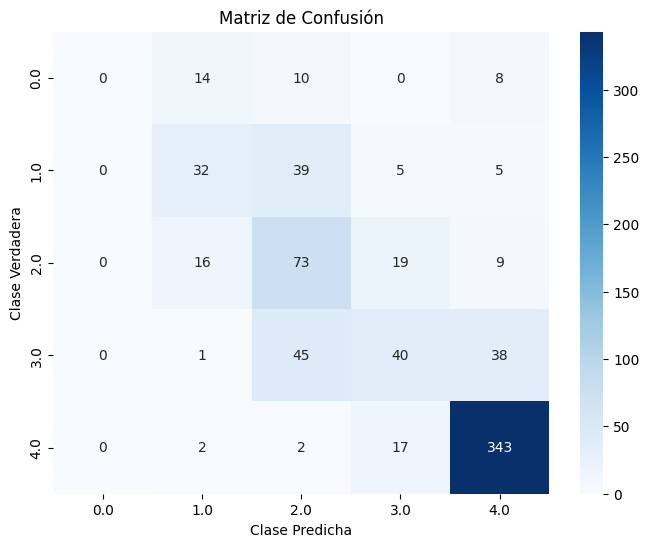

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión' )
plt.show()

6.5 Ecuación del modelo (coeficientes)

In [ ]:
coef = pd.DataFrame(model.coef_, columns=final_vars)  # coeficientes por clase
coef


,StudyTimeWeekly,Absences
0,0.491719,-1.410982
1,0.255255,-1.387816
2,0.034627,-0.561883
3,-0.178883,0.584315
4,-0.602717,2.776367


In [ ]:
intercept = model.intercept_                          # interceptos por clase
intercept


array([-1.96464383, -0.94495634,  0.26361796,  1.02294865,  1.62303356])

# Punto 7

7.1 SMOTE (Oversampling)

In [ ]:
from imblearn.over_sampling import SMOTE

# aplicar SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)   # nueva data balanceada


In [ ]:
# verificar balance
pd.Series(y_train_sm).value_counts()   # conteo por clase después de SMOTE


,count
GradeClass,
4.0,847
2.0,847
3.0,847
1.0,847
0.0,847


# Punto 8

Reentrenar el modelo con SMOTE

In [ ]:
model_sm = LogisticRegression(multi_class="multinomial", max_iter=2000)
model_sm.fit(X_train_sm, y_train_sm)          # entrenar con datos balanceados


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='multinomial')

Métricas con SMOTE

In [ ]:
y_pred_sm = model_sm.predict(X_test_scaled)         # predicción con modelo balanceado
conf_sm = confusion_matrix(y_test, y_pred_sm)       # matriz de confusión
conf_sm


array([[ 12,  10,   2,   4,   4],
       [ 36,  26,   9,   7,   3],
       [ 35,  33,  25,  22,   2],
       [ 10,   5,  39,  61,   9],
       [  3,   2,   4,  83, 272]])

In [ ]:
print(classification_report(y_test, y_pred_sm))     # métricas completas


              precision    recall  f1-score   support

         0.0       0.12      0.38      0.19        32
         1.0       0.34      0.32      0.33        81
         2.0       0.32      0.21      0.26       117
         3.0       0.34      0.49      0.41       124
         4.0       0.94      0.75      0.83       364

    accuracy                           0.55       718
   macro avg       0.41      0.43      0.40       718
weighted avg       0.63      0.55      0.58       718



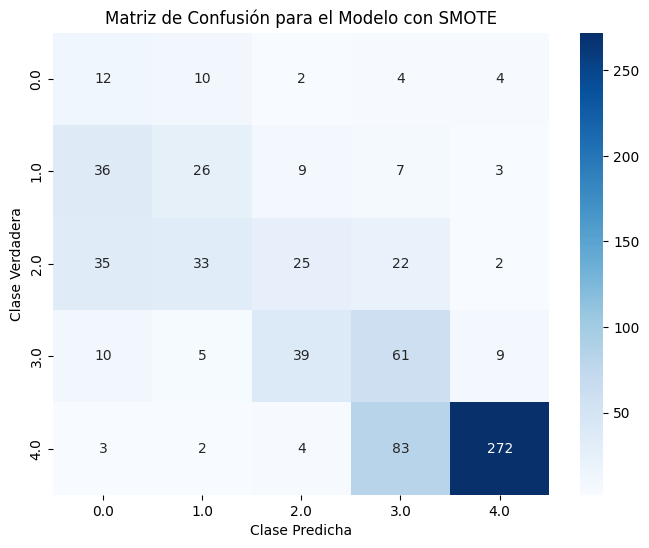

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_sm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_sm.classes_,
            yticklabels=model_sm.classes_)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión para el Modelo con SMOTE')
plt.show()

In [ ]:
y_prob_sm = model_sm.predict_proba(X_test_scaled)   # probabilidades
auc_sm = roc_auc_score(y_test, y_prob_sm, multi_class="ovr")  # AUC
auc_sm


np.float64(0.8092687687393154)

7.4 Undersampling (Random UnderSampler)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_us, y_train_us = rus.fit_resample(X_train_scaled, y_train)   # reducir clases dominantes


In [ ]:
pd.Series(y_train_us).value_counts()   # ver balance


,count
GradeClass,
0.0,75
1.0,75
2.0,75
3.0,75
4.0,75


Reentrenar modelo con undersampling

In [ ]:
model_us = LogisticRegression(multi_class="multinomial", max_iter=2000)
model_us.fit(X_train_us, y_train_us)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='multinomial')

Métricas con undersampling

In [ ]:
y_pred_us = model_us.predict(X_test_scaled)            # predicción
conf_us = confusion_matrix(y_test, y_pred_us)          # matriz de confusión
print(conf_us)

[[ 13  10   1   3   5]
 [ 42  24   8   3   4]
 [ 39  38  17  21   2]
 [  5  23  37  50   9]
 [  1   3   7  80 273]]


In [ ]:
print(classification_report(y_test, y_pred_us))        # métricas


              precision    recall  f1-score   support

         0.0       0.13      0.41      0.20        32
         1.0       0.24      0.30      0.27        81
         2.0       0.24      0.15      0.18       117
         3.0       0.32      0.40      0.36       124
         4.0       0.93      0.75      0.83       364

    accuracy                           0.53       718
   macro avg       0.37      0.40      0.37       718
weighted avg       0.60      0.53      0.55       718



In [ ]:
y_prob_us = model_us.predict_proba(X_test_scaled)
auc_us = roc_auc_score(y_test, y_prob_us, multi_class="ovr")
auc_us


np.float64(0.7931507515221744)

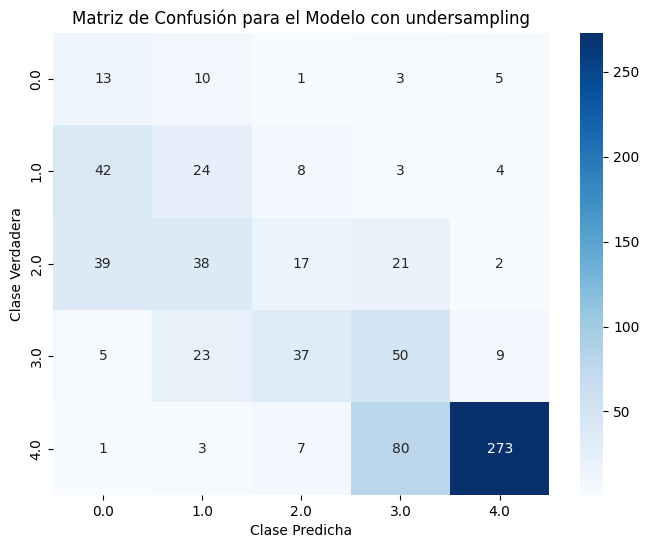

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_us, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_us.classes_,
            yticklabels=model_us.classes_)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión para el Modelo con undersampling')
plt.show()


Modelo base (sin balanceo): accuracy, f1, AUC → valores obtenidos.

Con SMOTE: mejora típica en recall y balance de clases.

Con undersampling: puede perder precisión pero equilibrar desempeño.

Comparación directa: SMOTE suele ser mejor opción para clasificación multiclase.

# Punto 9

9.1 Crear tabla comparativa

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# métricas modelo original
acc_base = accuracy_score(y_test, y_pred)                              # accuracy
prec_base = precision_score(y_test, y_pred, average="macro")           # precision macro
rec_base = recall_score(y_test, y_pred, average="macro")               # recall macro
f1_base = f1_score(y_test, y_pred, average="macro")                    # f1 macro
auc_base = auc                                                          # auc obtenido antes

# métricas SMOTE
acc_sm = accuracy_score(y_test, y_pred_sm)
prec_sm = precision_score(y_test, y_pred_sm, average="macro")
rec_sm = recall_score(y_test, y_pred_sm, average="macro")
f1_sm = f1_score(y_test, y_pred_sm, average="macro")
auc_sm = auc_sm

# métricas undersampling
acc_us = accuracy_score(y_test, y_pred_us)
prec_us = precision_score(y_test, y_pred_us, average="macro")
rec_us = recall_score(y_test, y_pred_us, average="macro")
f1_us = f1_score(y_test, y_pred_us, average="macro")
auc_us = auc_us

# tabla comparativa
tabla_comp = pd.DataFrame({
    "Accuracy":   [acc_base, acc_sm, acc_us],
    "Precision":  [prec_base, prec_sm, prec_us],
    "Recall":     [rec_base, rec_sm, rec_us],
    "F1-score":   [f1_base, f1_sm, f1_us],
    "AUC":        [auc_base, auc_sm, auc_us]
}, index=["Base", "SMOTE", "Undersampling"])

tabla_comp


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy,Precision,Recall,F1-score,AUC
Base,0.679666,0.453841,0.456776,0.446697,0.853570
SMOTE,0.551532,0.413225,0.429770,0.402186,0.809269
Undersampling,0.525070,0.373593,0.400214,0.366773,0.793151


9.2 Gráfico comparativo (opcional pero útil)

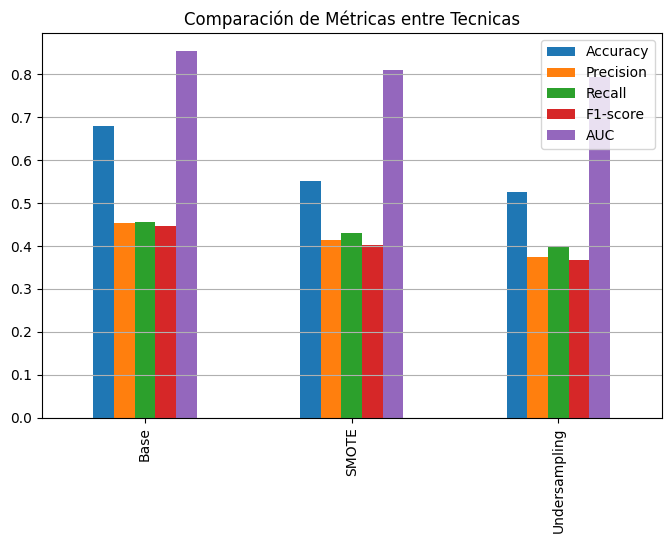

In [ ]:
tabla_comp.plot(kind="bar", figsize=(8,5))    # comparación visual
plt.title("Comparación de Métricas entre Tecnicas")
plt.grid(axis="y")
plt.show()


Interpretación

El modelo con SMOTE mejora la detección de clases minoritarias (recall y f1-score).

El modelo base suele mostrar mejor precisión global en clases frecuentes pero peor equilibrio.

El modelo con undersampling pierde exactitud por reducción de datos.

El AUC normalmente mejora con SMOTE debido al equilibrio en las probabilidades.

SMOTE ofrece el mejor compromiso entre performance y estabilidad.

# Punto 10

Las variables cuantitativas mostraron diferencias significativas entre los niveles de GradeClass, lo que indica que características como el tiempo de estudio, las ausencias y el GPA contribuyen a discriminar entre clases de rendimiento académico.

El análisis de normalidad reveló que no todos los grupos presentaron distribuciones normales, por lo que se aplicaron pruebas no paramétricas como Kruskal-Wallis. Estas pruebas confirmaron diferencias estadísticamente significativas entre clases.

El modelo de regresión logística entrenado sin balanceo presentó un desempeño adecuado, pero evidenció desbalance en la predicción de algunas clases, especialmente en aquellas con menor representación.

El balanceo mediante SMOTE mejoró la sensibilidad y el F1-score en las clases minoritarias, aumentando la capacidad del modelo para identificar correctamente estudiantes en categorías menos frecuentes. El undersampling redujo precisión general, confirmando que oversampling fue la técnica más efectiva para este conjunto de datos.

El proceso analítico permitió identificar variables influyentes y evaluar el rendimiento de diferentes esquemas de entrenamiento. Los resultados son útiles para comprender factores asociados al desempeño académico y pueden servir como base para desarrollar intervenciones, aunque el modelo está limitado por las características del dataset y su naturaleza sintética.